In [1]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
import sklearn
import cv2
import matplotlib.pyplot as plt

In [2]:
print(pd.__version__)
print(np.__version__)
print(tf.__version__)
print(sklearn.__version__)
print(cv2.__version__)

0.25.3
1.17.3
2.0.0
0.21.3
4.1.1


In [3]:
import os

In [4]:
image_dir = 'dataset/images/'
labels = 'dataset/labels.csv'

In [5]:
assert os.path.exists(os.path.abspath(image_dir))
assert os.path.exists(os.path.abspath(labels))

In [6]:
print(os.path.abspath(image_dir))
print(os.path.abspath(labels))

/html_tag_recognizer/dataset/images
/html_tag_recognizer/dataset/labels.csv


In [7]:
df = pd.read_csv(labels)

In [8]:
df.head()

,Unnamed: 0,Name,Type
0,0,image1,heading
1,1,image2,paragraph
2,2,image3,paragraph
3,3,image4,button
4,4,image5,image


In [9]:
del df['Unnamed: 0']

In [10]:
df

,Name,Type
0,image1,heading
1,image2,paragraph
2,image3,paragraph
3,image4,button
4,image5,image
...,...,...
395,image396,heading
396,image397,paragraph
397,image398,image
398,image399,paragraph


In [11]:
df.Type.unique()

array(['heading', 'paragraph', 'button', 'image', 'navbar', 'hyperlink'],
      dtype=object)

In [12]:
df.Type.value_counts()

hyperlink    89
image        87
heading      78
paragraph    64
button       56
navbar       26
Name: Type, dtype: int64

In [13]:
num_rows = 100
num_cols = 100
num_channels = 3

In [14]:
label_map = {
    'heading' : 0,
    'paragraph' : 1,
    'button' : 2,
    'image' : 3,
    'navbar' : 4,
    'hyperlink' : 5
}

In [15]:
image_dir_path = os.path.abspath(image_dir)

In [16]:
num_classes = len(df.Type.unique())
num_classes

6

In [17]:
X = []
Y = []

In [18]:
for item, label in zip(df['Name'], df['Type']):
    img_name = item + '.PNG'
    img_path = os.path.join(image_dir_path, img_name)
    assert os.path.exists(img_path)
    img = cv2.resize(cv2.imread(img_path, cv2.IMREAD_COLOR), (num_rows, num_cols), interpolation = cv2.INTER_CUBIC)
    X.append(img)
    Y.append(label_map[label])

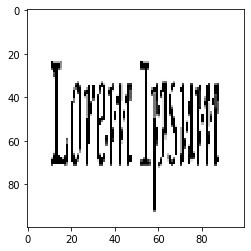

In [19]:
#Visualize one image
plt.imshow(X[0])
plt.show()

In [20]:
X_train = np.array(X)
Y_train = np.array(Y)

In [21]:
print(X_train.shape)
print(Y_train.shape)

(400, 100, 100, 3)
(400,)


In [22]:
import seaborn as sns

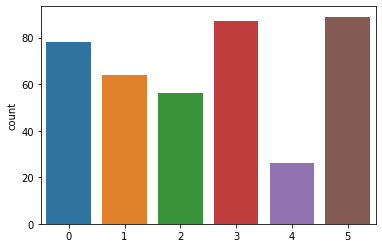

In [23]:
sns.countplot(Y_train)

In [24]:
from tensorflow import keras

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (num_rows, num_cols, num_channels)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(num_classes, activation = 'softmax')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               15360512  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 15,525,510
Trainable params: 15,525,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [28]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = 'model.h5', monitor = "acc", verbose = 1, save_best_only = True)

In [29]:
history = model.fit(X_train, Y_train, epochs = 100, callbacks = [checkpoint])

Train on 400 samples
Epoch 1/100
384/400 [===========================>..] - ETA: 0s - loss: 7220.1525 - acc: 0.1745
Epoch 00001: acc improved from -inf to 0.18250, saving model to model.h5
400/400 [==============================] - 6s 15ms/sample - loss: 7070.3375 - acc: 0.1825
Epoch 2/100
384/400 [===========================>..] - ETA: 0s - loss: 2275.1458 - acc: 0.2422
Epoch 00002: acc improved from 0.18250 to 0.24250, saving model to model.h5
400/400 [==============================] - 5s 12ms/sample - loss: 2260.0614 - acc: 0.2425
Epoch 3/100
384/400 [===========================>..] - ETA: 0s - loss: 2871.5175 - acc: 0.1901
Epoch 00003: acc did not improve from 0.24250
400/400 [==============================] - 2s 5ms/sample - loss: 2808.9876 - acc: 0.1925
Epoch 4/100
384/400 [===========================>..] - ETA: 0s - loss: 1895.0007 - acc: 0.2057
Epoch 00004: acc did not improve from 0.24250
400/400 [==============================] - 2s 5ms/sample - loss: 1912.3841 - acc: 0.2075


384/400 [===========================>..] - ETA: 0s - loss: 95.0163 - acc: 0.4349
Epoch 00034: acc did not improve from 0.62750
400/400 [==============================] - 2s 5ms/sample - loss: 99.6726 - acc: 0.4225
Epoch 35/100
384/400 [===========================>..] - ETA: 0s - loss: 74.9976 - acc: 0.5182
Epoch 00035: acc did not improve from 0.62750
400/400 [==============================] - 2s 5ms/sample - loss: 74.9952 - acc: 0.5150
Epoch 36/100
384/400 [===========================>..] - ETA: 0s - loss: 53.2262 - acc: 0.5495
Epoch 00036: acc did not improve from 0.62750
400/400 [==============================] - 2s 5ms/sample - loss: 56.3087 - acc: 0.5425
Epoch 37/100
384/400 [===========================>..] - ETA: 0s - loss: 95.0474 - acc: 0.4219
Epoch 00037: acc did not improve from 0.62750
400/400 [==============================] - 2s 5ms/sample - loss: 91.8480 - acc: 0.4375
Epoch 38/100
384/400 [===========================>..] - ETA: 0s - loss: 75.0479 - acc: 0.5417
Epoch 00038

Epoch 70/100
384/400 [===========================>..] - ETA: 0s - loss: 5.4259 - acc: 0.7083
Epoch 00070: acc did not improve from 0.83500
400/400 [==============================] - 2s 6ms/sample - loss: 5.2560 - acc: 0.7150
Epoch 71/100
384/400 [===========================>..] - ETA: 0s - loss: 4.4793 - acc: 0.7839
Epoch 00071: acc did not improve from 0.83500
400/400 [==============================] - 2s 6ms/sample - loss: 4.5776 - acc: 0.7725
Epoch 72/100
384/400 [===========================>..] - ETA: 0s - loss: 4.8247 - acc: 0.7240
Epoch 00072: acc did not improve from 0.83500
400/400 [==============================] - 2s 6ms/sample - loss: 4.8671 - acc: 0.7250
Epoch 73/100
384/400 [===========================>..] - ETA: 0s - loss: 6.3225 - acc: 0.6953
Epoch 00073: acc did not improve from 0.83500
400/400 [==============================] - 3s 6ms/sample - loss: 6.2537 - acc: 0.6975
Epoch 74/100
384/400 [===========================>..] - ETA: 0s - loss: 6.3907 - acc: 0.6979
Epoch 0

In [30]:
acc = history.history['acc']
loss = history.history['loss']

In [31]:
print("Accuracy : ", max(acc))

Accuracy :  0.885


In [32]:
print("Loss : ", min(loss))

Loss :  1.655896077156067


In [33]:
epochs = range(1, len(acc) + 1)

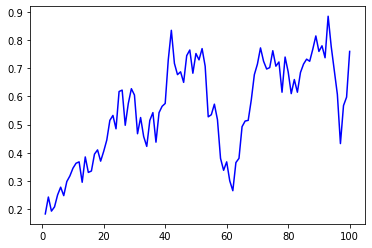

In [34]:
plt.plot(epochs, acc, 'b', label = 'Training Accuracy')

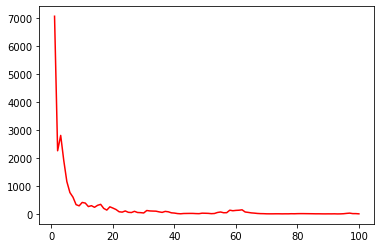

In [35]:
plt.plot(epochs, loss, 'r', label = 'Training Loss')

In [36]:
!ls

dataset  model.h5  tag_predictor.ipynb


In [37]:
test_image = 'dataset/test_image1.png'
test_img = cv2.resize(cv2.imread(test_image, cv2.IMREAD_COLOR), (num_rows, num_cols), interpolation = cv2.INTER_CUBIC)

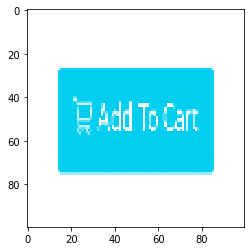

In [38]:
plt.imshow(test_img)
plt.show()

In [39]:
x_test = np.array(test_img)

In [40]:
x_test.shape

(100, 100, 3)

In [41]:
x_test = np.expand_dims(x_test, 0)

In [42]:
x_test.shape

(1, 100, 100, 3)

In [43]:
prediction = model.predict(x_test)

In [44]:
prediction

array([[4.7173064e-32, 1.2028322e-19, 1.0000000e+00, 3.2619750e-34,
        4.5368269e-34, 3.8128865e-30]], dtype=float32)

In [45]:
np.argmax(prediction[0])

2